In this assignment we are supposed to apply KNN algorithm to train the model to predict the survivor rate. As earlier assignments we ahve applied different algorithms now after applying this algorithm we are supposed to compare all the algorithms based on the results.

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Importing datasets
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")

In [3]:
#Top 5 rows of the training dataset
train_data.head()

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,1,2,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,2,3,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,3,4,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,4,5,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1


In [4]:
#Top 5 rows of the test dataset
test_data.head()

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,791,792,0,1,0.2000,0.050749,0,1,0,0.0,1,0,0,0,0,0,1
1,792,793,0,0,0.3500,0.135753,0,0,1,1.0,0,0,0,1,0,0,1
2,793,794,0,1,0.3500,0.059914,1,0,0,0.0,1,0,0,0,1,0,0
3,794,795,0,1,0.3125,0.015412,0,0,1,0.0,1,0,0,0,0,0,1
4,795,796,0,1,0.4875,0.025374,0,1,0,0.0,1,0,0,0,0,0,1


In [5]:
train_data.info

<bound method DataFrame.info of      Unnamed: 0  PassengerId  Survived  Sex  ...  Title_4  Emb_1  Emb_2  Emb_3
0             0            1         0    1  ...        0      0      0      1
1             1            2         1    0  ...        0      1      0      0
2             2            3         1    0  ...        1      0      0      1
3             3            4         1    0  ...        0      0      0      1
4             4            5         0    1  ...        0      0      0      1
..          ...          ...       ...  ...  ...      ...    ...    ...    ...
787         787          788         0    1  ...        0      0      1      0
788         788          789         1    1  ...        0      0      0      1
789         789          790         0    1  ...        0      1      0      0
790         790          791         0    1  ...        0      0      1      0
791         791          792         0    1  ...        0      0      0      1

[792 rows x 17 colu

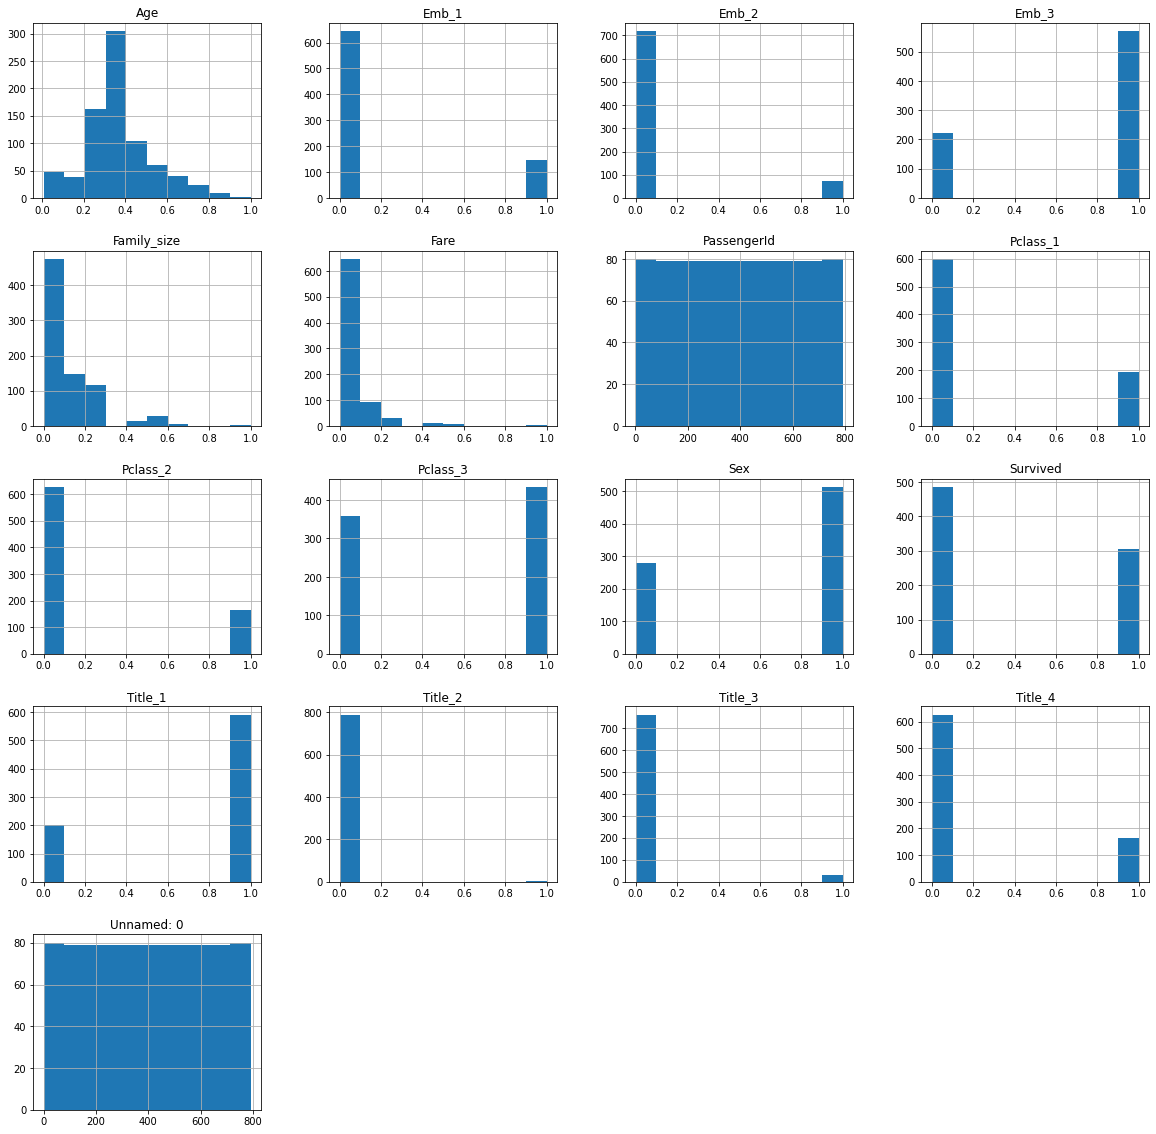

In [6]:
#Checking the distribution of attributes in the dataset:
dis = train_data.hist(figsize=(20,20))

In [0]:
#Dropping unproductive table
train_data.drop("Unnamed: 0",axis=1, inplace= True)
test_data.drop("Unnamed: 0",axis=1, inplace= True)
train_data.drop("PassengerId",axis=1, inplace= True)
test_data.drop("PassengerId",axis=1, inplace= True)

In [0]:
#Spliting datasets into dependent & independent variable
X_train = train_data.drop("Survived", axis=1)
y_train = train_data["Survived"]
X_test = test_data.drop("Survived", axis=1)
y_test = test_data["Survived"]

In [0]:
#Applying the model on the dataset
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


After applying all the split and importing the libraries its time to apply the model. In this we have taken a random value of k as 10. further we will find the best value of k to the better results.



In [0]:
# Put models in dictionary to make function
model_1 = {"KNN": KNN(n_neighbors = 10)}

#Create a function to fit and score models
def fit_and_score(model_1, X_train, X_test, y_train, y_test):
    
    """
    Fits and evaluate given machine learnin models.
    models: A dict of different Scikit-larn machine learning models
    X_train: training data
    X_test: testinng data
    y_train: traininng labels
    y_test: test labels
    """
    #set random seed
    np.random.seed(42)
    
    #Make a dictionary to keep model scores
    model_scores = {}
    
    #Loop through models
    for name, model in model_1.items():
        #Fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name]=model.score(X_test, y_test)
    return model_scores

In [11]:
#Calculating the score
model_scores = fit_and_score(model_1=model_1,
                            X_train = X_train,
                            X_test= X_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

{'KNN': 0.78}

Now as we have applied the KNN model with the random value of k it is important to find the best value of k so that our model can be trained more robustly. Therefore we have used Elbow method to find the value of k.

In [0]:
def Elbow(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(X_train, y_train)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(X_test)
        tmp = f1_score(tmp,y_test)
        error = 1-tmp
        test_error.append(error)
    
    return test_error

In [0]:
#Defining K range
k = range(4, 20, 1)

In [0]:
# calling above defined function
test = Elbow(k)

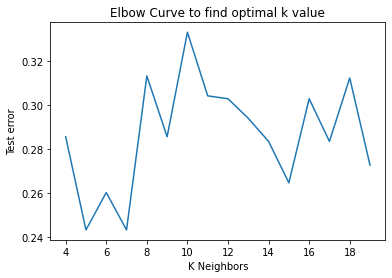

In [15]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve to find optimal k value');

The above graph shows the loss or error by the model on different values of k. From the graph we can see if the value of k = 5 or 7 then model will be minimum error so we are again fitting hte model with K = 5 and lets see if there is some signifcant change in the results.


In [0]:

# Put models in dictionary to make function
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNN(n_neighbors = 7),
         "Decision": DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, min_samples_leaf=3, min_samples_split=14 ,random_state= 42)}

#Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    """
    Fits and evaluate given machine learnin models.
    models: A dict of different Scikit-larn machine learning models
    X_train: training data
    X_test: testinng data
    y_train: traininng labels
    y_test: test labels
    """
    #set random seed
    np.random.seed(42)
    
    #Make a dictionary to keep model scores
    model_scores = {}
    
    #Loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name]=model.score(X_test, y_test)
    return model_scores

In [17]:
#Calculating the score
model_scores = fit_and_score(models=models,
                            X_train = X_train,
                            X_test= X_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

{'Decision': 0.87, 'KNN': 0.82, 'Logistic Regression': 0.88}

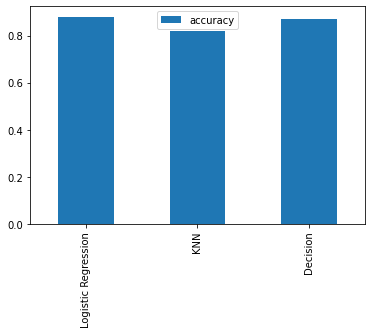

In [18]:
#Model comaprision
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar();

In the above results we can see that the value of KNN model have increased by 4%. On the other hand it is not performing as good as logistic regression. So, further if i need to move i would have picked logistic regression to predict the values. 